In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from vulnerability_networks.config import PATH_PROCESSED_DATA, PATH_FIGURES
import numpy as np
import scienceplots
import joblib
plt.style.use(['science','ieee'])
rc_fonts = {
    "font.size": 13,
    #'figure.figsize': (4, 3),
}
plt.rcParams.update(rc_fonts)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('tips')

In [3]:
times_by_scenario = joblib.load(PATH_PROCESSED_DATA/"times_by_scenario.pkl")
data = []
for scenarios, v in times_by_scenario.items():
    for method, time in v.items():
        for t in time:
            methods = {"gnn_ge": "GNN", "gnn_ip": "GNN", "ge": "Sequential", "ip": "Sequential", "ge_parallel": "Parallel", "ip_parallel": "Parallel"}
            data.append({"scenarios": scenarios, "method": methods[method], "time": t})

In [4]:
new_df = pd.DataFrame(data)

In [5]:
# # Create and display the plot
# boxprops = dict(linestyle='-', linewidth=.5)
# flierprops = dict(marker='x', markersize=3)
# medianprops = dict(linestyle='-', linewidth=1, color=(.1, .1, .1), markeredgewidth=10)
# # meanpointprops = dict(marker='D', markeredgecolor='black',markerfacecolor='firebrick')
# # meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')

# ax = sns.boxplot(x="day",
#             y="total_bill",
#             hue="smoker",
#             fill=True,
#             flierprops=flierprops,
#             fliersize=3.8,
#             medianprops=medianprops,
#             whiskerprops={"ls": "-", "lw": .7, "marker":None},
#             boxprops=boxprops,
#             capprops=dict(linewidth=.7),
#             data=df,
#             palette=["r", "b", "g"])
# for patch in ax.patches:
#     r, g, b, a = patch.get_facecolor()
#     patch.set_facecolor((r, g, b, .8))
# plt.legend(loc="lower center", bbox_to_anchor=(0.25, 1, 0.5, 0.5), ncols=2)
# plt.show()

In [6]:
ax

NameError: name 'ax' is not defined

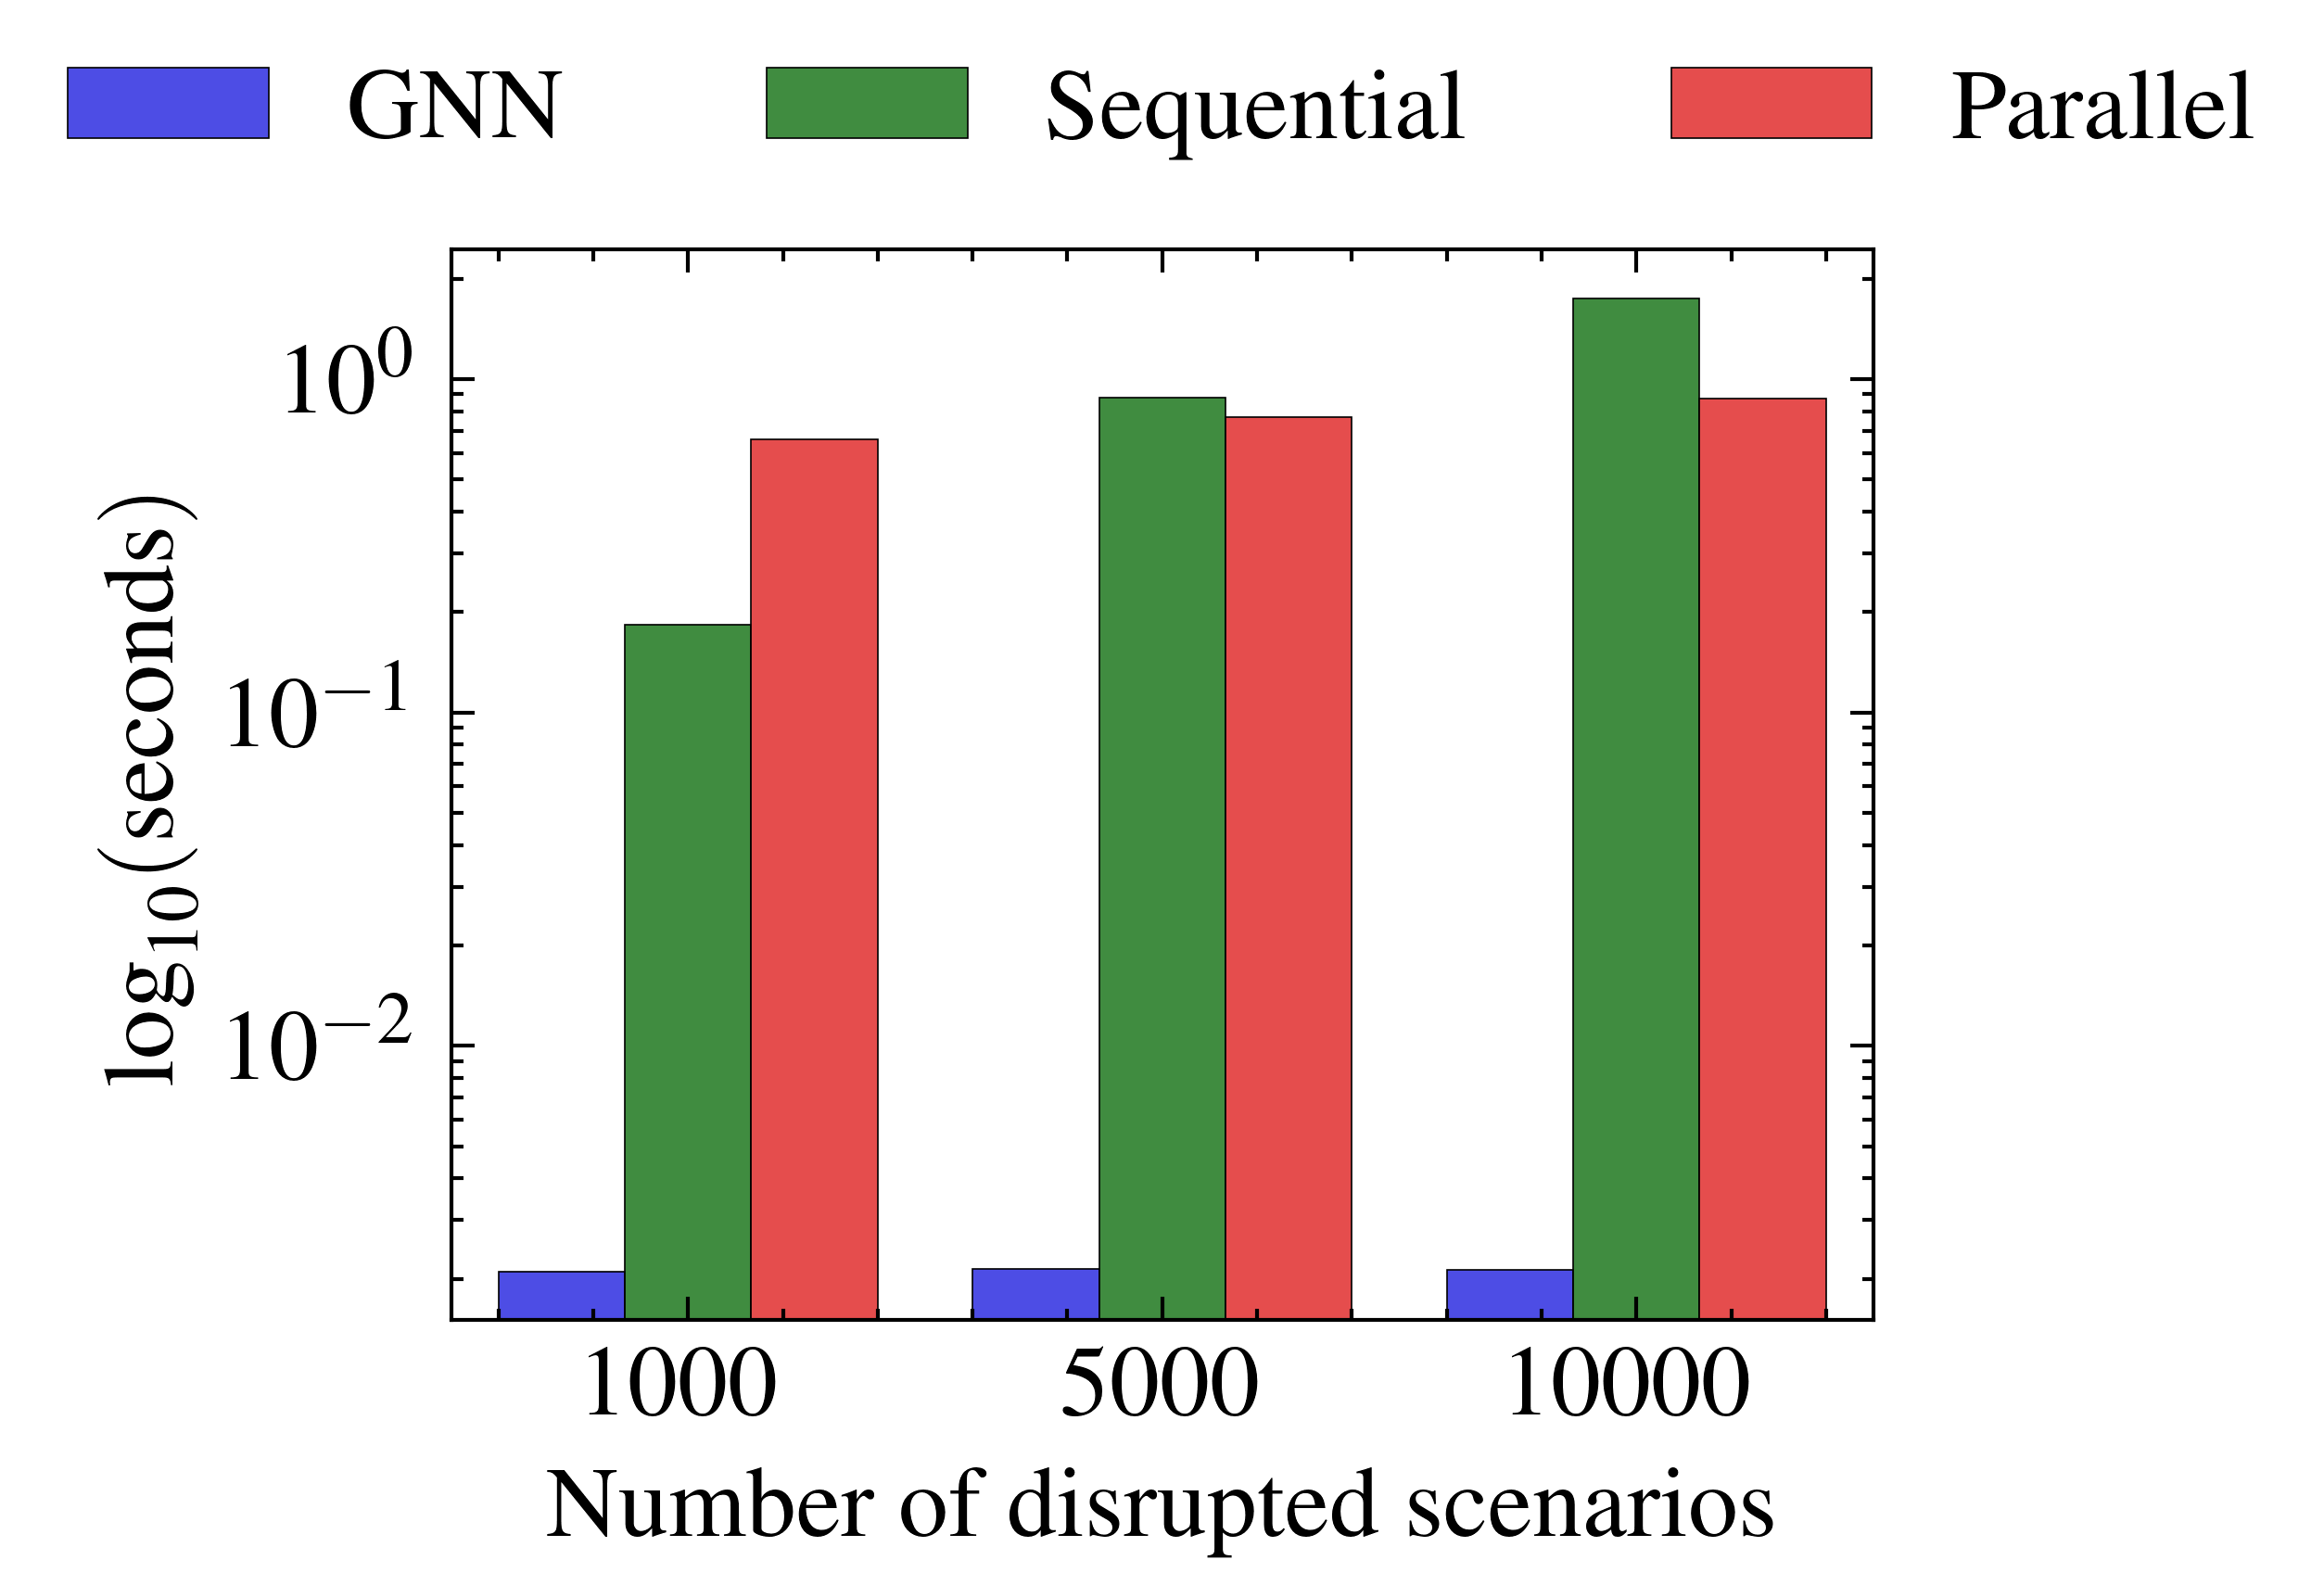

In [7]:
# Create and display the plot
boxprops = dict(linestyle='-', linewidth=.5)
flierprops = dict(marker='x', markersize=3)
medianprops = dict(linestyle='-', linewidth=1, color=(.1, .1, .1), markeredgewidth=10)
# meanpointprops = dict(marker='D', markeredgecolor='black',markerfacecolor='firebrick')
# meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')

ax = sns.barplot(x="scenarios",
            y="time",
            hue="method",
            # log_scale=True,
            fill=True,
            # barprops={"lw": 1},
            # flierprops=flierprops,
            # fliersize=3.8,
            # medianprops=medianprops,
            # whiskerprops={"ls": "-", "lw": .7, "marker":None},
            # boxprops=boxprops,
            # capprops=dict(linewidth=.7),
            errorbar=None,
            data=new_df,
            linewidth=.2,
            edgecolor="k",
            palette=["b", "g", "r"])
for patch in ax.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .8))
plt.legend(loc="lower center", bbox_to_anchor=(0.25, 1, 0.5, 0.5), ncols=3)

plt.ylabel("Seconds")
plt.yscale("log")
plt.ylabel(r"$$\log_{10}(\text{seconds})$$")
plt.xlabel("Number of disrupted scenarios")
plt.savefig(PATH_FIGURES/"n_scenarios_timing_log_presentation.pdf", transparent=True)
plt.show()